## CONIECO O RANDOM FOREST
* wykorzystywany jest głównie w zadaniach klasyfikacyjnych i regresyjnych
* Algorytm lasów losowych tworzy wiele drzew decyzyjnych, które łączą swoje przewidywania w jedno końcowe rozwiązanie

**Jak działa algorytm lasu losowego?**

Algorytm lasu losowego działa na zasadzie tworzenia wielu drzew decyzyjnych, gdzie każde drzewo jest budowane na podstawie losowo wybranych podzbiorów danych. Każde drzewo w analizie otrzymuje także losowy zestaw cech, co pozwala na uzyskanie różnych prognoz dla tego samego problemu. Kluczową cechą tego algorytmu jest to, że końcową predykcję uzyskuje się poprzez uśrednienie wyników ze wszystkich drzew, co znacznie zwiększa stabilność i dokładność modelu. Dzięki temu algorytm lasu losowego jest odporny na przetrenowanie i skutecznie radzi sobie z szumem w danych, co czyni go jednym z najbardziej niezawodnych narzędzi do rozwiązywania zadań predykcyjnych w wielu dziedzinach, takich jak analiza ryzyka, klasyfikacja czy regresja.

# ZAŁADDOWANIE DANYCH

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [386]:
from openpyxl import load_workbook

In [388]:
sns.set_style("whitegrid")

In [390]:
#pobranie ramki danych i wyświetlenie 5 pierwszych rekordów
df_raw = pd.read_csv('dane_przeplywy_198111_202504.csv', sep=",")
df_raw.head()

,Unnamed: 0,ROK,MSCK,DZ,149180010,149180020,149180040,149180060,149180110,149180130,...,154160040,150200130,150180260,149190190,151220060,153210080,153190160,152190060,153190010,153150070
0,1,1980,11,1,34.0,29.3,1.22,3.49,1.66,0.29,...,1.99,124.0,0.35,1.05,6.35,7.67,9.30,1.48,2.70,0.64
1,2,1980,11,2,32.0,24.7,1.30,3.04,1.54,0.26,...,1.75,126.0,0.35,0.87,6.09,7.60,8.85,1.44,2.27,0.56
2,3,1980,11,3,31.0,22.5,1.40,3.04,1.42,0.26,...,1.64,111.0,0.32,0.87,5.57,7.60,7.95,1.35,2.16,0.50
3,4,1980,11,4,31.0,22.5,1.51,3.17,1.30,0.22,...,1.62,107.0,0.38,0.87,5.18,7.41,7.26,1.35,2.23,0.48
4,5,1980,11,5,30.0,22.5,1.58,3.16,1.22,0.22,...,1.62,128.0,0.30,1.05,5.05,7.22,6.85,1.31,1.75,0.45


In [392]:
df_raw

,Unnamed: 0,ROK,MSCK,DZ,149180010,149180020,149180040,149180060,149180110,149180130,...,154160040,150200130,150180260,149190190,151220060,153210080,153190160,152190060,153190010,153150070
0,1,1980,11,1,34.0,29.3,1.22,3.49,1.66,0.29,...,1.99,124.0,0.35,1.05,6.35,7.67,9.30,1.48,2.70,0.64
1,2,1980,11,2,32.0,24.7,1.30,3.04,1.54,0.26,...,1.75,126.0,0.35,0.87,6.09,7.60,8.85,1.44,2.27,0.56
2,3,1980,11,3,31.0,22.5,1.40,3.04,1.42,0.26,...,1.64,111.0,0.32,0.87,5.57,7.60,7.95,1.35,2.16,0.50
3,4,1980,11,4,31.0,22.5,1.51,3.17,1.30,0.22,...,1.62,107.0,0.38,0.87,5.18,7.41,7.26,1.35,2.23,0.48
4,5,1980,11,5,30.0,22.5,1.58,3.16,1.22,0.22,...,1.62,128.0,0.30,1.05,5.05,7.22,6.85,1.31,1.75,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,16248,2025,4,26,35.0,26.1,0.73,7.24,1.76,0.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16248,16249,2025,4,27,29.8,24.2,0.69,4.34,1.45,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16249,16250,2025,4,28,24.9,22.7,0.69,3.41,1.23,0.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16250,16251,2025,4,29,22.9,21.9,0.69,2.87,1.07,0.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [394]:
df_raw.info()  # info o tabeli

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16252 entries, 0 to 16251
Columns: 446 entries, Unnamed: 0 to 153150070
dtypes: float64(435), int64(11)
memory usage: 55.3 MB


In [404]:
# Dodanie daty
df_raw['data'] = pd.to_datetime(dict(year=df_raw['ROK'], month=df_raw['MSCK'], day=df_raw['DZ']))

# ZERKNIJMY TERAZ NA WARTOŚCI PUSTE I POSEGREUJMY JE

In [396]:
# Sortujemy wynik według liczby NA (malejąco) i resetujemy indeks
na_table = pd.DataFrame({
    'kolumna': df_raw.columns,
    'ilosc_NA': df_raw.isna().sum().values
})
na_table_sorted = na_table.sort_values(by='ilosc_NA', ascending=False).reset_index(drop=True)

In [550]:
na_table_sorted

,kolumna,ilosc_NA
0,152150120,912
1,152190060,547
2,153190160,547
3,153190010,547
4,153150070,547
...,...,...
441,149190240,0
442,149180240,0
443,154170060,0
444,154170080,0


In [400]:
# nowa zmienna która trzyma id wszytkichj stacji z brakami
c_missi_seq = na_table_sorted[na_table_sorted['ilosc_NA'] > 0].kolumna.values
c_missi_seq

array(['152150120', '152190060', '153190160', '153190010', '153150070',
       '153160150', '152170020', '149190190', '154160040', '151220060',
       '153210080', '150180260', '153140080', '153160070', '150200130',
       '154170180', '151200100', '152150170', '151220130', '153160260',
       '153160030', '153210040', '153200160', '151230030', '154210030',
       '154160090', '154160100', '150190190', '153190020', '153210010',
       '153210050', '153210020', '154170020', '154170030', '153150120',
       '154170130', '154170070', '154170040', '154160030', '152190110',
       '153160250', '154180110', '153170110', '153180040', '153150090',
       '153140100', '149190200', '153150080', '153150030', '152230010',
       '150170070', '153190140', '152230050', '153200010', '154180010',
       '154200040', '151210130', '151220110', '151220120', '153220220',
       '151200110', '150200060', '153220150', '153220110', '153220290',
       '151190110', '152210040', '154160130', '153220240', '1521

# ZOBACZMY TERAZ PRZYKŁADOWY WYKRES PRZEPŁYWU

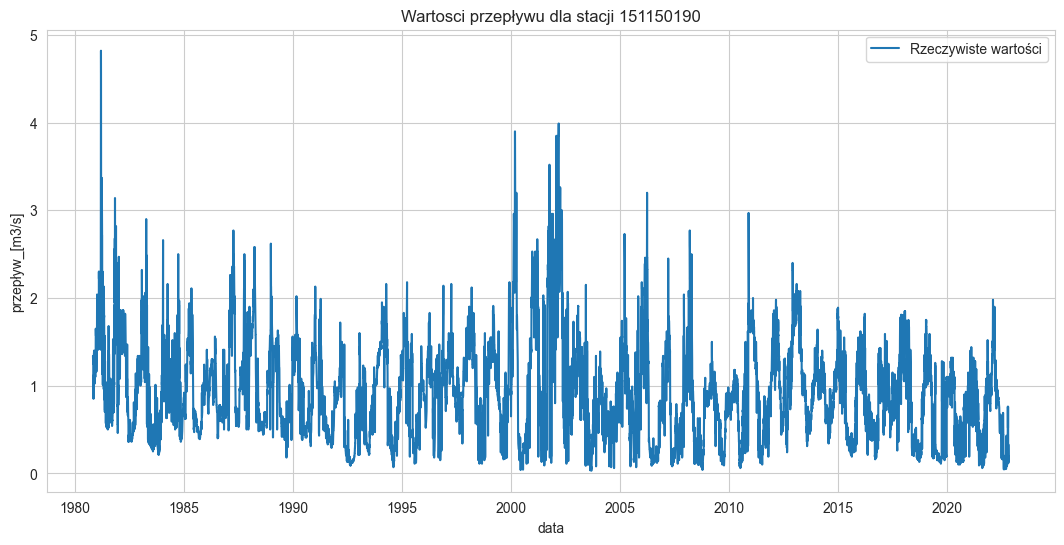

In [406]:
#Przykładowy wykres przeplywu
plt.figure(figsize=(13, 6))
plt.plot(df_raw['data'], df_raw['152150120'], label='Rzeczywiste wartości')
plt.xlabel("data")
plt.ylabel("przepływ_[m3/s]")
plt.title("Wartosci przepływu dla stacji 151150190")
plt.legend()
plt.show()

# TERAZ ZAJMIEMY SIE KORELACJAMI 

In [418]:
df_raw_selected = df_raw.iloc[:, 4:]

In [422]:
df_raw_selected = df_raw_selected.iloc[:, :-1]

In [430]:
df_raw_selected

,149180010,149180020,149180040,149180060,149180110,149180130,149180140,149180220,149180230,149180240,...,154160040,150200130,150180260,149190190,151220060,153210080,153190160,152190060,153190010,153150070
0,34.0,29.3,1.22,3.49,1.66,0.29,0.62,1.14,0.36,4.10,...,1.99,124.0,0.35,1.05,6.35,7.67,9.30,1.48,2.70,0.64
1,32.0,24.7,1.30,3.04,1.54,0.26,0.62,1.09,0.40,3.53,...,1.75,126.0,0.35,0.87,6.09,7.60,8.85,1.44,2.27,0.56
2,31.0,22.5,1.40,3.04,1.42,0.26,0.62,1.03,0.32,3.16,...,1.64,111.0,0.32,0.87,5.57,7.60,7.95,1.35,2.16,0.50
3,31.0,22.5,1.51,3.17,1.30,0.22,0.62,1.03,0.32,3.34,...,1.62,107.0,0.38,0.87,5.18,7.41,7.26,1.35,2.23,0.48
4,30.0,22.5,1.58,3.16,1.22,0.22,0.54,1.26,0.40,2.97,...,1.62,128.0,0.30,1.05,5.05,7.22,6.85,1.31,1.75,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,35.0,26.1,0.73,7.24,1.76,0.37,0.92,0.27,1.90,12.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16248,29.8,24.2,0.69,4.34,1.45,0.30,0.85,0.25,1.11,9.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16249,24.9,22.7,0.69,3.41,1.23,0.29,0.80,0.25,0.85,8.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16250,22.9,21.9,0.69,2.87,1.07,0.28,0.78,0.25,0.68,7.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [432]:
#tworzenie macierzy korelacji
cor_matrix = df_raw_selected.corr(method='pearson')

In [433]:
cor_matrix

,149180010,149180020,149180040,149180060,149180110,149180130,149180140,149180220,149180230,149180240,...,154160040,150200130,150180260,149190190,151220060,153210080,153190160,152190060,153190010,153150070
149180010,1.000000,0.959560,0.686603,0.805149,0.750050,0.617220,0.675517,0.723297,0.643055,0.796491,...,0.149437,0.732570,0.542708,0.529956,0.368677,0.170965,0.263552,0.284582,0.253181,0.161446
149180020,0.959560,1.000000,0.702549,0.793611,0.709911,0.611569,0.648438,0.711719,0.637341,0.733340,...,0.150429,0.685186,0.526252,0.510526,0.366372,0.182726,0.270681,0.298168,0.263641,0.158979
149180040,0.686603,0.702549,1.000000,0.638896,0.528739,0.469743,0.451108,0.576852,0.561203,0.531680,...,0.194484,0.419308,0.297405,0.378247,0.212489,0.147994,0.185547,0.183200,0.165182,0.181855
149180060,0.805149,0.793611,0.638896,1.000000,0.896390,0.796170,0.814703,0.584733,0.764328,0.688380,...,0.154286,0.573320,0.402773,0.697972,0.288364,0.140565,0.249661,0.196829,0.218761,0.184217
149180110,0.750050,0.709911,0.528739,0.896390,1.000000,0.813790,0.933609,0.538539,0.681808,0.694786,...,0.123274,0.615592,0.413883,0.712999,0.273615,0.154055,0.225069,0.210032,0.201098,0.157123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153210080,0.170965,0.182726,0.147994,0.140565,0.154055,0.139668,0.135645,0.180844,0.038886,0.089467,...,0.457963,0.174639,0.157364,0.103616,0.501390,1.000000,0.560437,0.542253,0.640400,0.395853
153190160,0.263552,0.270681,0.185547,0.249661,0.225069,0.229198,0.200449,0.296007,0.079473,0.142503,...,0.456961,0.250494,0.222681,0.135421,0.683991,0.560437,1.000000,0.575545,0.745220,0.484712
152190060,0.284582,0.298168,0.183200,0.196829,0.210032,0.177563,0.186668,0.304162,0.097729,0.219724,...,0.337410,0.304612,0.411187,0.116550,0.581368,0.542253,0.575545,1.000000,0.710517,0.319963
153190010,0.253181,0.263641,0.165182,0.218761,0.201098,0.207781,0.187159,0.272159,0.059606,0.138031,...,0.487527,0.232191,0.250798,0.114735,0.633707,0.640400,0.745220,0.710517,1.000000,0.440560


In [436]:
# Usuwamy korelacje własne (==1.0) przez zamianę na NaN
cor_matrix_no_self = cor_matrix.copy()
for col in cor_matrix.columns:
    cor_matrix_no_self.loc[col, col] = None

In [438]:
cor_matrix_no_self

,149180010,149180020,149180040,149180060,149180110,149180130,149180140,149180220,149180230,149180240,...,154160040,150200130,150180260,149190190,151220060,153210080,153190160,152190060,153190010,153150070
149180010,NaN,0.959560,0.686603,0.805149,0.750050,0.617220,0.675517,0.723297,0.643055,0.796491,...,0.149437,0.732570,0.542708,0.529956,0.368677,0.170965,0.263552,0.284582,0.253181,0.161446
149180020,0.959560,NaN,0.702549,0.793611,0.709911,0.611569,0.648438,0.711719,0.637341,0.733340,...,0.150429,0.685186,0.526252,0.510526,0.366372,0.182726,0.270681,0.298168,0.263641,0.158979
149180040,0.686603,0.702549,NaN,0.638896,0.528739,0.469743,0.451108,0.576852,0.561203,0.531680,...,0.194484,0.419308,0.297405,0.378247,0.212489,0.147994,0.185547,0.183200,0.165182,0.181855
149180060,0.805149,0.793611,0.638896,NaN,0.896390,0.796170,0.814703,0.584733,0.764328,0.688380,...,0.154286,0.573320,0.402773,0.697972,0.288364,0.140565,0.249661,0.196829,0.218761,0.184217
149180110,0.750050,0.709911,0.528739,0.896390,NaN,0.813790,0.933609,0.538539,0.681808,0.694786,...,0.123274,0.615592,0.413883,0.712999,0.273615,0.154055,0.225069,0.210032,0.201098,0.157123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153210080,0.170965,0.182726,0.147994,0.140565,0.154055,0.139668,0.135645,0.180844,0.038886,0.089467,...,0.457963,0.174639,0.157364,0.103616,0.501390,NaN,0.560437,0.542253,0.640400,0.395853
153190160,0.263552,0.270681,0.185547,0.249661,0.225069,0.229198,0.200449,0.296007,0.079473,0.142503,...,0.456961,0.250494,0.222681,0.135421,0.683991,0.560437,NaN,0.575545,0.745220,0.484712
152190060,0.284582,0.298168,0.183200,0.196829,0.210032,0.177563,0.186668,0.304162,0.097729,0.219724,...,0.337410,0.304612,0.411187,0.116550,0.581368,0.542253,0.575545,NaN,0.710517,0.319963
153190010,0.253181,0.263641,0.165182,0.218761,0.201098,0.207781,0.187159,0.272159,0.059606,0.138031,...,0.487527,0.232191,0.250798,0.114735,0.633707,0.640400,0.745220,0.710517,NaN,0.440560


## Funkcja uzyskująca 3 najwyzsze korelacje 

In [440]:
# Funkcja do wyciągnięcia 3 najwyższych korelacji dla jednej kolumny
def get_top3_corr(col):
    top_corr = cor_matrix_no_self[col].dropna().sort_values(ascending=False).head(3)
    return pd.Series({
        'top1': top_corr.index[0], 'corr1': top_corr.values[0],
        'top2': top_corr.index[1], 'corr2': top_corr.values[1],
        'top3': top_corr.index[2], 'corr3': top_corr.values[2],
    })

# Zastosuj funkcję do każdej kolumny
top_corr_df = cor_matrix_no_self.columns.to_series().apply(get_top3_corr)
top_corr_df.index.name = 'zmienna'
top_corr_df = top_corr_df.reset_index()

# Wyświetl wynik
print(top_corr_df.head())

     zmienna       top1     corr1       top2     corr2       top3     corr3
0  149180010  150180060  0.976743  149180020  0.959560  150190140  0.842726
1  149180020  149180010  0.959560  150180060  0.951290  150170180  0.829008
2  149180040  150180120  0.761968  150180220  0.727553  149180020  0.702549
3  149180060  149180110  0.896390  149190100  0.875338  149180140  0.814703
4  149180110  149180140  0.933609  149180060  0.896390  149190100  0.880499


In [444]:
top_corr_df_only_miss = top_corr_df[top_corr_df['zmienna'].isin(c_missi_seq)]

In [446]:
top_corr_df_only_miss

,zmienna,top1,corr1,top2,corr2,top3,corr3
2,149180040,150180120,0.761968,150180220,0.727553,149180020,0.702549
18,149190200,149190100,0.881481,149190210,0.880898,149190290,0.844538
20,149190220,149190190,0.842757,149190210,0.828788,149190100,0.825145
22,149190260,149190210,0.891104,149190290,0.877578,149190180,0.865305
63,149220170,149220140,0.827682,149210140,0.672796,149210110,0.667794
...,...,...,...,...,...,...,...
437,153210080,153210050,0.880872,153200160,0.826696,153210170,0.822391
438,153190160,152200020,0.901616,153200020,0.866273,153200010,0.859852
439,152190060,152190020,0.805754,152180150,0.757615,152180130,0.740327
440,153190010,153180150,0.921867,153190020,0.865336,153180140,0.850962


# FUNKCJA KTÓRA PRZYGOTOWYJE DANE ZE STACJI DO MODELU
#### FUNKCJA PONIŻEJ POZBYWA SIĘ BRAKÓW DANYCH NA POTRZEBY WYKONANIA MODELÓW

In [530]:
def przygotowanie_danych(df_raw, top_corr_df_only_miss, id):
    missing_data_station = df_raw[[id, 'data']].copy()  # 106 NAN

    cor_0 = df_raw[[(top_corr_df.loc[top_corr_df['zmienna'] == id, 'top1'].values[0]), 'data']]
    cor_1 = df_raw[[(top_corr_df.loc[top_corr_df['zmienna'] == id, 'top2'].values[0]), 'data']]
    cor_2 = df_raw[[(top_corr_df.loc[top_corr_df['zmienna'] == id, 'top3'].values[0]), 'data']]
    
    d_to_remove1 = missing_data_station[missing_data_station.iloc[:, 0].isna()]['data']
    d_to_remove2 = cor_0[cor_0.iloc[:, 0].isna()]['data']
    d_to_remove3 = cor_1[cor_1.iloc[:, 0].isna()]['data']
    d_to_remove4 = cor_2[cor_2.iloc[:, 0].isna()]['data']

    d_to_remove = pd.concat([d_to_remove1, d_to_remove2, d_to_remove3, d_to_remove4], ignore_index=True)

    missing_data_station_no_na = missing_data_station[~missing_data_station['data'].isin(d_to_remove)]
    cor_0_no_na = cor_0[~cor_0['data'].isin(d_to_remove)]
    cor_1_no_na = cor_1[~cor_1['data'].isin(d_to_remove)]
    cor_2_no_na = cor_2[~cor_2['data'].isin(d_to_remove)]

    df_station = pd.DataFrame({
    'Przeplyw_badanej': missing_data_station_no_na.iloc[:, 0].values,
    'Przeplyw_cor_1': cor_0_no_na.iloc[:, 0].values,
    'Przeplyw_cor_2': cor_1_no_na.iloc[:, 0].values,
    'Przeplyw_cor_3': cor_2_no_na.iloc[:, 0].values,
    'Data': missing_data_station_no_na.iloc[:, 1].values
    })

    df_station_with_na = pd.DataFrame({
    'Przeplyw_badanej': missing_data_station.iloc[:, 0].values,
    'Przeplyw_cor_1': cor_0.iloc[:, 0].values,
    'Przeplyw_cor_2': cor_1.iloc[:, 0].values,
    'Przeplyw_cor_3': cor_2.iloc[:, 0].values,
    'Data': missing_data_station['data'].values
    })

    df_station["day_of_year"] = df_station["Data"].dt.dayofyear
    df_station_with_na["day_of_year"] = df_station_with_na["Data"].dt.dayofyear


    # Zwracamy dwie ramki danych
    return df_station, df_station_with_na

# INTERPOLACJA BRAKÓW POPRZEZ ZASTOSOWANIE ALGORYTMU RANDOM FOREST 
#### WSAD DO ALGORYMU STANOWIĄ 3 NAJBARDZIEJ SKORELOWANE STACJE DO STACJI BADANEJ

In [532]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def rand_forest_fill(df, top_corr, seq):
    df_filled = df.copy()
    df_filled['data'] = pd.to_datetime(df_filled['data'])  # upewniamy się, że data to datetime

    for stacja_id in seq:
        print(f"\n--- Uzupełnianie braków dla stacji: {stacja_id} ---")
        
        # Przygotowanie danych
        df_station, df_station_with_na = przygotowanie_danych(df, top_corr, stacja_id)

        # Sprawdź, czy są braki
        missing_mask = df_station_with_na['Przeplyw_badanej'].isna()
        if missing_mask.sum() == 0:
            print("Brak brakujących danych. Pomijam.")
            continue

        # X i y do modelu
        X = df_station.drop(columns=["Przeplyw_badanej", "Data"])
        y = df_station["Przeplyw_badanej"]

        # Podział na trening i test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, shuffle=True
        )

        # Trenowanie modelu
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Predykcja na zbiorze testowym
        y_pred = model.predict(X_test)

        # Metryki
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

        # Przewidywanie brakujących danych
        X_missing = df_station_with_na.loc[missing_mask, X.columns]
        y_missing_pred = model.predict(X_missing)

        df_station_with_na.loc[missing_mask, 'Przeplyw_badanej'] = y_missing_pred

        # Ustawienie indeksów czasowych
        df_station_with_na['Data'] = pd.to_datetime(df_station_with_na['Data'])
        df_station_with_na = df_station_with_na.set_index('Data')
        df_filled = df_filled.set_index('data')

        # Wstawienie uzupełnionych wartości do oryginalnej tabeli
        df_filled.loc[df_filled[stacja_id].isna(), stacja_id] = df_station_with_na['Przeplyw_badanej']

        # Przywracanie indeksu
        df_filled = df_filled.reset_index()

    return df_filled


## Objaśnienie parametrow 
### MAE - Mean Absolute Error (Średi Błąd Bezwzględny)
👉 Średnia różnica między wartością przewidzianą przez model a rzeczywistą wartością.
Liczy się "ile się model średnio myli" bez względu na kierunek (czy zawyżył, czy zaniżył).

✅ Przykład:
Jeśli przepływ wynosił 2.0, a model przewidział 1.85 → błąd to 0.15.
MAE to średnia takich błędów na wszystkich przykładach.

### MSE - Mean Squaed Error (Średi Błąd Kwadratowy)
👉 Bierze te same błędy co MAE, ale podnosi je do kwadratu. Dzięki temu:
większe błędy są bardziej "karane" (0.5² = 0.25, a 2.0² = 4.0)
metryka jest wrażliwa na duże błędy (np. pomyłki typu 5 zamiast 0)

📌 MSE daje Ci pojęcie o stabilności modelu – jeśli jest wysokie, pewnie masz pojedyncze duże błędy.

### RMSE – Root Mean Squared Error (Pierwiastek z MSE)
👉 To po prostu pierwiastek z MSE, żeby jednostki były takie same jak w danych (np. m³/s).
RMSE daje podobną informację co MAE, ale bardziej karze duże błędy.

📌 Jeśli RMSE > MAE, to znaczy, że w danych są jakieś większe odchylenia.

### R² – Współczynnik determinacji
👉 Mówi, jak dobrze model wyjaśnia zmienność danych:
1.0 = model idealny
0.0 = model nie lepszy niż zgadywanie średniej
< 0 = model gorszy niż zgadywanie średniej 

In [534]:
x = rand_forest_fill(df_raw, top_corr_df_only_miss, c_missi_seq)


--- Uzupełnianie braków dla stacji: 152150120 ---
MAE: 0.1556, RMSE: 0.2337, R²: 0.8246

--- Uzupełnianie braków dla stacji: 152190060 ---
MAE: 0.1226, RMSE: 0.2490, R²: 0.9531

--- Uzupełnianie braków dla stacji: 153190160 ---
MAE: 0.5103, RMSE: 0.9734, R²: 0.8939

--- Uzupełnianie braków dla stacji: 153190010 ---
MAE: 0.1403, RMSE: 0.2579, R²: 0.9313

--- Uzupełnianie braków dla stacji: 153150070 ---
MAE: 0.0476, RMSE: 0.0876, R²: 0.6839

--- Uzupełnianie braków dla stacji: 153160150 ---
MAE: 0.0815, RMSE: 0.1360, R²: 0.9515

--- Uzupełnianie braków dla stacji: 152170020 ---
MAE: 0.0658, RMSE: 0.1193, R²: 0.9433

--- Uzupełnianie braków dla stacji: 149190190 ---
MAE: 0.2848, RMSE: 0.6568, R²: 0.8503

--- Uzupełnianie braków dla stacji: 154160040 ---
MAE: 0.1167, RMSE: 0.2243, R²: 0.6927

--- Uzupełnianie braków dla stacji: 151220060 ---
MAE: 0.3621, RMSE: 0.6691, R²: 0.8796

--- Uzupełnianie braków dla stacji: 153210080 ---
MAE: 0.1969, RMSE: 0.3007, R²: 0.9554

--- Uzupełnianie bra

In [ ]:
x.to_excel('uzupelnione_test03.06.xlsx', index=False)

# POJEDYNCZY PRZYKŁAD RANDOM FOREST NA STACJI O NUMERZE 152150120

In [234]:
# Wywołanie funkcji
df_station, df_station_with_na = przygotowanie_danych(df_raw, top_corr_df, '152150120')

In [260]:
df_station

,Przeplyw_badanej,Przeplyw_cor_1,Przeplyw_cor_2,Przeplyw_cor_3,Data,day_of_year
0,1.34,15.10,24.9,114.0,1980-11-01,306
1,1.28,15.60,24.9,116.0,1980-11-02,307
2,1.28,15.40,24.9,118.0,1980-11-03,308
3,1.25,15.00,24.9,119.0,1980-11-04,309
4,1.28,14.70,24.9,118.0,1980-11-05,310
...,...,...,...,...,...,...
15335,0.19,4.80,11.5,40.9,2022-10-27,300
15336,0.19,4.67,11.6,41.0,2022-10-28,301
15337,0.19,4.63,11.8,39.9,2022-10-29,302
15338,0.19,4.69,11.8,39.8,2022-10-30,303


In [262]:
# Podział na zmienne X (wejściowe) i y (przepływ do przewidzenia)
X = df_station.drop(columns=["Przeplyw_badanej", "Data"])  # Wszystkie zmienne wejściowe oprócz targetu
y = df_station["Przeplyw_badanej"]  # To, co przewidujemy


# Losowy podział danych na zbiór treningowy i testowy, ale zachowujący chronologię (shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Posortowanie danych w celu zachowania chronologii (rosnące indeksy)
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

# Sprawdzenie rozmiarów danych po podziale
print(f"Rozmiar X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Rozmiar y_train: {y_train.shape}, y_test: {y_test.shape}")

Rozmiar X_train: (12272, 4), X_test: (3068, 4)
Rozmiar y_train: (12272,), y_test: (3068,)


In [264]:
# Znalezienie brakujących wartości
missing_idx =df_station_with_na['Przeplyw_badanej'].isna()
missing_idx_indices = missing_idx[missing_idx].index
missing_idx_indices

Index([15340, 15341, 15342, 15343, 15344, 15345, 15346, 15347, 15348, 15349,
       ...
       16242, 16243, 16244, 16245, 16246, 16247, 16248, 16249, 16250, 16251],
      dtype='int64', length=912)

In [266]:
# Trenowanie modelu Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [268]:
y_pred = rf.predict(X_test)  # Model przewiduje przepływ dla zbioru testowego

In [270]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [272]:
# Obliczenie metryk jakości modelu
mae = mean_absolute_error(y_test, y_pred)  # Średni błąd absolutny
mse = mean_squared_error(y_test, y_pred)  # Błąd średniokwadratowy
rmse = np.sqrt(mse)  # Pierwiastek z błędu średniokwadratowego
r2 = r2_score(y_test, y_pred)  # Współczynnik determinacji R²

# Wyświetlenie wyników
print(f"Średni błąd absolutny (MAE): {mae:.4f}")
print(f"Błąd średniokwadratowy (MSE): {mse:.4f}")
print(f"Pierwiastek z błędu średniokwadratowego (RMSE): {rmse:.4f}")
print(f"Współczynnik determinacji R²: {r2:.4f}")

Średni błąd absolutny (MAE): 0.1551
Błąd średniokwadratowy (MSE): 0.0547
Pierwiastek z błędu średniokwadratowego (RMSE): 0.2338
Współczynnik determinacji R²: 0.8244


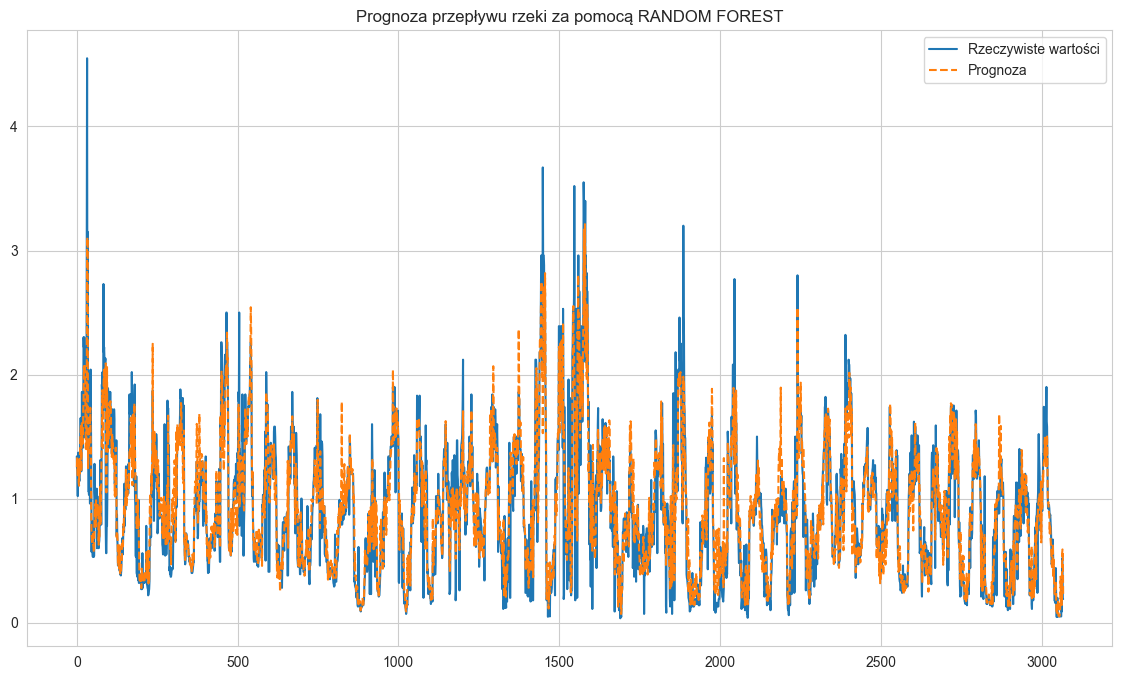

In [316]:
plt.figure(figsize=(14, 8))
plt.plot(y_test, label="Rzeczywiste wartości")
plt.plot(y_pred, label="Prognoza", linestyle="dashed")
plt.legend()
plt.title("Prognoza przepływu rzeki za pomocą RANDOM FOREST")
plt.show()

In [278]:
# Przewidywanie brakujących wartości
X_missing = df_station_with_na.loc[missing_idx, ["Przeplyw_cor_1", "Przeplyw_cor_2", "Przeplyw_cor_3", "day_of_year"]]
df_station_with_na.loc[missing_idx, 'Przeplyw_badanej'] = rf.predict(X_missing)

df_station_with_na[missing_idx]

,Przeplyw_badanej,Przeplyw_cor_1,Przeplyw_cor_2,Przeplyw_cor_3,Data,day_of_year
15340,0.4624,4.41,12.0,37.2,2022-11-01,305
15341,0.5006,4.46,12.6,37.0,2022-11-02,306
15342,0.4989,4.41,13.0,37.3,2022-11-03,307
15343,0.5569,4.35,13.0,37.8,2022-11-04,308
15344,0.4843,4.55,13.3,40.0,2022-11-05,309
...,...,...,...,...,...,...
16247,0.8469,5.58,16.2,44.7,2025-04-26,116
16248,0.8361,5.55,16.1,44.7,2025-04-27,117
16249,0.8379,5.30,16.2,44.8,2025-04-28,118
16250,0.7105,5.03,16.0,42.9,2025-04-29,119


In [378]:
df_raw_filled_na = df_raw.copy()

In [380]:
# Ustaw daty jako indeksy (upewniamy się, że typ to datetime)
df_raw_filled_na['data'] = pd.to_datetime(df_raw_filled_na['data'])
df_station_with_na['Data'] = pd.to_datetime(df_station_with_na['Data'])

df_raw_filled_na = df_raw_filled_na.set_index('data')
df_station_with_na = df_station_with_na.set_index('Data')

# Uzupełniamy brakujące dane
df_raw_filled_na.loc[df_raw_filled_na['152150120'].isna(), '152150120'] = df_station_with_na['Przeplyw_badanej']

# (Opcjonalnie) przywrócenie kolumny 'data'
df_raw_filled_na = df_raw_filled_na.reset_index()

In [542]:
x

,data,Unnamed: 0,ROK,MSCK,DZ,149180010,149180020,149180040,149180060,149180110,...,154160040,150200130,150180260,149190190,151220060,153210080,153190160,152190060,153190010,153150070
0,1980-11-01,1,1980,11,1,34.0,29.3,1.22,3.49,1.66,...,1.9900,124.000,0.3500,1.0500,6.3500,7.6700,9.3000,1.4800,2.7000,0.6400
1,1980-11-02,2,1980,11,2,32.0,24.7,1.30,3.04,1.54,...,1.7500,126.000,0.3500,0.8700,6.0900,7.6000,8.8500,1.4400,2.2700,0.5600
2,1980-11-03,3,1980,11,3,31.0,22.5,1.40,3.04,1.42,...,1.6400,111.000,0.3200,0.8700,5.5700,7.6000,7.9500,1.3500,2.1600,0.5000
3,1980-11-04,4,1980,11,4,31.0,22.5,1.51,3.17,1.30,...,1.6200,107.000,0.3800,0.8700,5.1800,7.4100,7.2600,1.3500,2.2300,0.4800
4,1980-11-05,5,1980,11,5,30.0,22.5,1.58,3.16,1.22,...,1.6200,128.000,0.3000,1.0500,5.0500,7.2200,6.8500,1.3100,1.7500,0.4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,2025-04-26,16248,2025,4,26,35.0,26.1,0.73,7.24,1.76,...,1.0199,92.803,0.3877,2.6819,1.6506,2.5735,2.4549,0.4902,0.6891,0.2267
16248,2025-04-27,16249,2025,4,27,29.8,24.2,0.69,4.34,1.45,...,1.0152,84.415,0.3924,1.5767,1.6353,2.5639,2.2826,0.7540,0.6922,0.2163
16249,2025-04-28,16250,2025,4,28,24.9,22.7,0.69,3.41,1.23,...,1.0154,81.183,0.3775,0.9030,1.7098,2.5545,2.2047,0.7988,0.6996,0.2043
16250,2025-04-29,16251,2025,4,29,22.9,21.9,0.69,2.87,1.07,...,1.0283,78.417,0.3956,0.8792,1.6626,2.5545,2.2020,0.3822,0.7081,0.1982
